In [1]:
import networkx as nx
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
G = nx.random_graphs.fast_gnp_random_graph(7, 0.4)

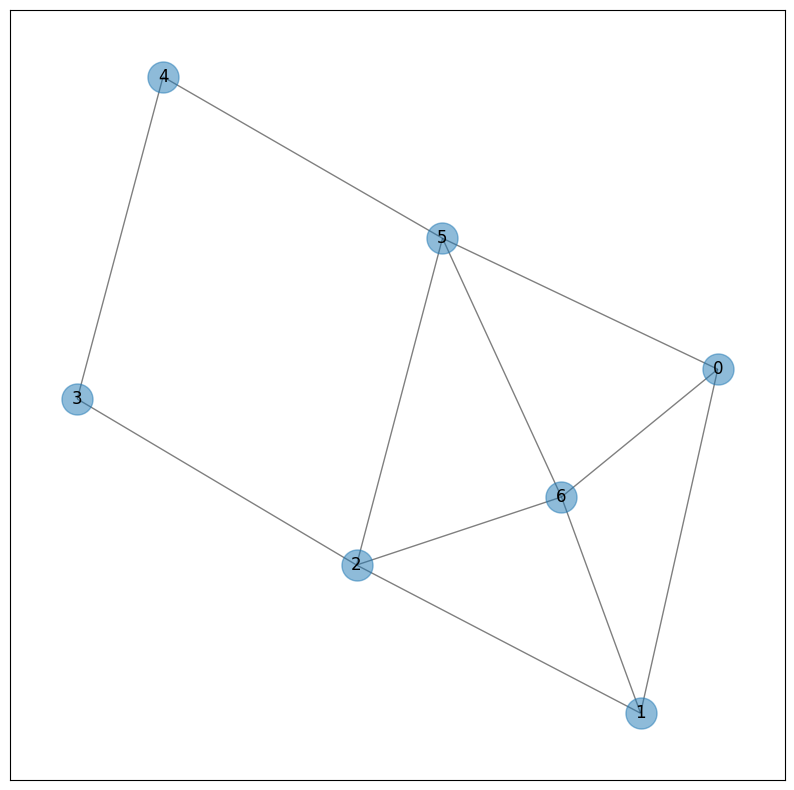

In [3]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500, alpha=0.5)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
draw_graph(G)

In [4]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

In [5]:
G.edges

EdgeView([(0, 1), (0, 5), (0, 6), (1, 2), (1, 6), (2, 3), (2, 5), (2, 6), (3, 4), (4, 5), (5, 6)])

In [6]:
def bfs(graph, starting_node):
    visited = []
    queue = [starting_node]
    
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)            
            for edge in graph.edges:
                if edge[0] == node:
                    queue.append(edge[1])
                elif edge[1] == node:
                    queue.append(edge[0])
    return visited

In [7]:
bfs(G, 1)

[1, 0, 2, 6, 5, 3, 4]

In [8]:
def find_shortest_path(graph, starting_node, goal):
    visited = []
    queue = [[starting_node]]
    
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in visited:
            neighbours = []
            for edge in graph.edges:
                if edge[0] == node:
                    neighbours.append(edge[1])
                elif edge[1] == node:
                    neighbours.append(edge[0])
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                
                if neighbour == goal:
                    return new_path
            
            visited.append(node)
            
    return []

In [9]:
find_shortest_path(G, 1, 3)

[1, 2, 3]